In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from collections import OrderedDict


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")


pd.set_option('display.max_columns', None)

In [22]:
# Reading Files and Creating Data Frame
df1 = pd.read_csv('~/Desktop/TechnicalTask/dataset/dataset.csv')

df.head()

,Order Date,Purchase Order,Customer ID,Customer Location,Order Req Amt (Ton),Fullfilled By ID,Fullfilled By Location,Supplied Amt (Ton),Cost Of Delivery ($)
0,02/10/21 01:11,50f43343-e930-4f2e-91be-606bc018c872,c53fa27e-c8c2-4b77-a89a-6ed11fa87317,Cincinatti,203,19f4a11d-63ca-4127-975a-15933aaa33ff,Omaha,203,2233
1,02/10/21 04:17,cb06e4cc-5469-4e30-a92f-287ae4a62896,d20009ca-5479-4232-8b07-7c8c11f74c2e,St Louis,127,cf9651b0-df49-498f-a66c-0a7f897545ce,Kansas City,127,1016
2,02/10/21 04:43,a23e6eb8-8a52-434b-b35c-5c1d3a70b0ea,70080304-afa3-4026-9c86-95970c4ed5b4,Chicago,242,ae5d7b77-86c9-49d2-ac18-09bf9883adc2,Des Moines,210,840
3,02/09/21 03:26,cd5fdc3d-b08f-426e-bc9e-fb25a676d2be,c53fa27e-c8c2-4b77-a89a-6ed11fa87317,Cincinatti,188,cf9651b0-df49-498f-a66c-0a7f897545ce,Kansas City,188,1880
4,02/09/21 05:08,90474d73-46c2-4e7a-a42e-27907d13fe48,70080304-afa3-4026-9c86-95970c4ed5b4,Chicago,154,19f4a11d-63ca-4127-975a-15933aaa33ff,Omaha,154,1078


In [23]:
print("order_dataset: ",df.shape)

order_dataset:  (168, 9)


In [24]:
# Slice data into faeture and target
X = df1.drop(['Order Date', 'Purchase Order', 'Customer ID','Supplied Amt (Ton)', 'Fullfilled By ID','Fullfilled By Location', 'Cost Of Delivery ($)'], axis=1)
y =df1['Fullfilled By ID']

In [25]:
# divide into train and test sets
df1_trainX, df1_testX, df1_trainY, df1_testY = train_test_split(X,y, test_size=0.2, random_state=5)

# converting nominal variables into dummy variables
pf = pd.get_dummies(df1_trainX['Customer Location'], prefix='Customer Location')
df1_trainX = pd.concat([df1_trainX, pf],axis=1)


# converting nominal variables into dummy variables
pf = pd.get_dummies(df1_testX['Customer Location'], prefix='Customer Location')
df1_testX = pd.concat([df1_testX, pf],axis=1)

df1_trainX.drop(['Customer Location'], axis=1, inplace=True)

df1_testX.drop(['Customer Location'], axis=1, inplace=True)

In [40]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB()
    ]

log_cols=["Classifier", "Accuracy", "Precision","Recall","F1Score"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(df1_trainX, df1_trainY)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(df1_testX)
    acc = accuracy_score(df1_testY, train_predictions)
    f1 = f1_score(clf.predict(df1_testX),df1_testY,pos_label='positive',
                                           average='micro')
    pre = precision_score(clf.predict(df1_testX),df1_testY,pos_label='positive',
                                           average='micro')
    rec = recall_score(clf.predict(df1_testX),df1_testY,pos_label='positive',
                                           average='micro')
   
    print("Accuracy: {:.4%}".format(acc))
    print("Precision: {:.4%}".format(pre))
    print("Recall: {:.4%}".format(rec))
    print("F1 Score: {:.4%}".format(f1))


    train_predictions = clf.predict_proba(df1_testX)
    ll = log_loss(df1_testY, train_predictions)
    print("Log Loss: {:.4}".format(ll))
    
    log_entry = pd.DataFrame([[name, pre*100, rec*100,f1*100,ll]], columns=log_cols)
    log = log.append(log_entry)
print("="*30)
round(log,3)

LogisticRegression
****Results****
Accuracy: 50.0000%
Precision: 50.0000%
Recall: 50.0000%
F1 Score: 50.0000%
Log Loss: 0.9716
KNeighborsClassifier
****Results****
Accuracy: 55.8824%
Precision: 55.8824%
Recall: 55.8824%
F1 Score: 55.8824%
Log Loss: 4.606
DecisionTreeClassifier
****Results****
Accuracy: 64.7059%
Precision: 64.7059%
Recall: 64.7059%
F1 Score: 64.7059%
Log Loss: 12.19
RandomForestClassifier
****Results****
Accuracy: 55.8824%
Precision: 55.8824%
Recall: 55.8824%
F1 Score: 55.8824%
Log Loss: 1.973
AdaBoostClassifier
****Results****
Accuracy: 52.9412%
Precision: 52.9412%
Recall: 52.9412%
F1 Score: 52.9412%
Log Loss: 1.016
GradientBoostingClassifier
****Results****
Accuracy: 64.7059%
Precision: 64.7059%
Recall: 64.7059%
F1 Score: 64.7059%
Log Loss: 1.043
GaussianNB
****Results****
Accuracy: 52.9412%
Precision: 52.9412%
Recall: 52.9412%
F1 Score: 52.9412%
Log Loss: 1.541


,Classifier,Accuracy,Precision,Recall,F1Score
0,LogisticRegression,50.000,50.000,50.000,0.972
0,KNeighborsClassifier,55.882,55.882,55.882,4.606
0,DecisionTreeClassifier,64.706,64.706,64.706,12.190
0,RandomForestClassifier,55.882,55.882,55.882,1.973
0,AdaBoostClassifier,52.941,52.941,52.941,1.016
0,GradientBoostingClassifier,64.706,64.706,64.706,1.043
0,GaussianNB,52.941,52.941,52.941,1.541


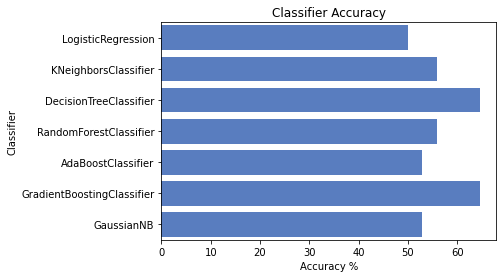

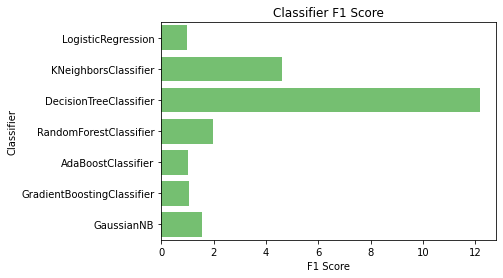

In [41]:

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()


sns.set_color_codes("muted")
sns.barplot(x='F1Score', y='Classifier', data=log, color="g")

plt.xlabel('F1 Score')
plt.title('Classifier F1 Score')

plt.show()

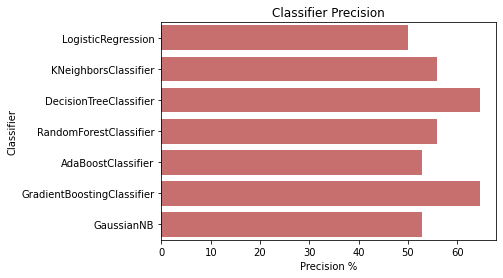

In [43]:
sns.set_color_codes("muted")
sns.barplot(x='Precision', y='Classifier', data=log, color="r")

plt.xlabel('Precision %')
plt.title('Classifier Precision')
plt.show()




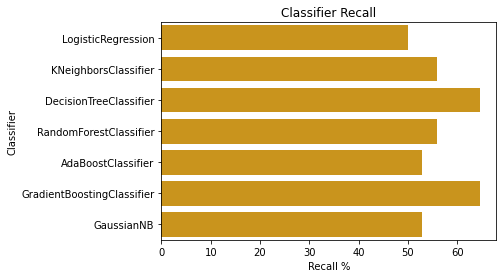

In [44]:
sns.set_color_codes("muted")
sns.barplot(x='Recall', y='Classifier', data=log, color="#E69F00")

plt.xlabel('Recall %')
plt.title('Classifier Recall')
plt.show()
